First 5 rows of the dataset:
   Unnamed: 0        p_id                                               name  \
0           0  17048614.0  Khushal K Women Black Ethnic Motifs Printed Ku...   
1           1  16524740.0  InWeave Women Orange Solid Kurta with Palazzos...   
2           2  16331376.0  Anubhutee Women Navy Blue Ethnic Motifs Embroi...   
3           3  14709966.0  Nayo Women Red Floral Printed Kurta With Trous...   
4           4  11056154.0   AHIKA Women Black & Green Printed Straight Kurta   

    price     colour      brand  \
0  5099.0      Black  Khushal K   
1  5899.0     Orange    InWeave   
2  4899.0  Navy Blue  Anubhutee   
3  3699.0        Red       Nayo   
4  1350.0      Black      AHIKA   

                                                 img  ratingCount  avg_rating  \
0  http://assets.myntassets.com/assets/images/170...       4522.0    4.418399   
1  http://assets.myntassets.com/assets/images/165...       1081.0    4.119334   
2  http://assets.myntassets.com/asse

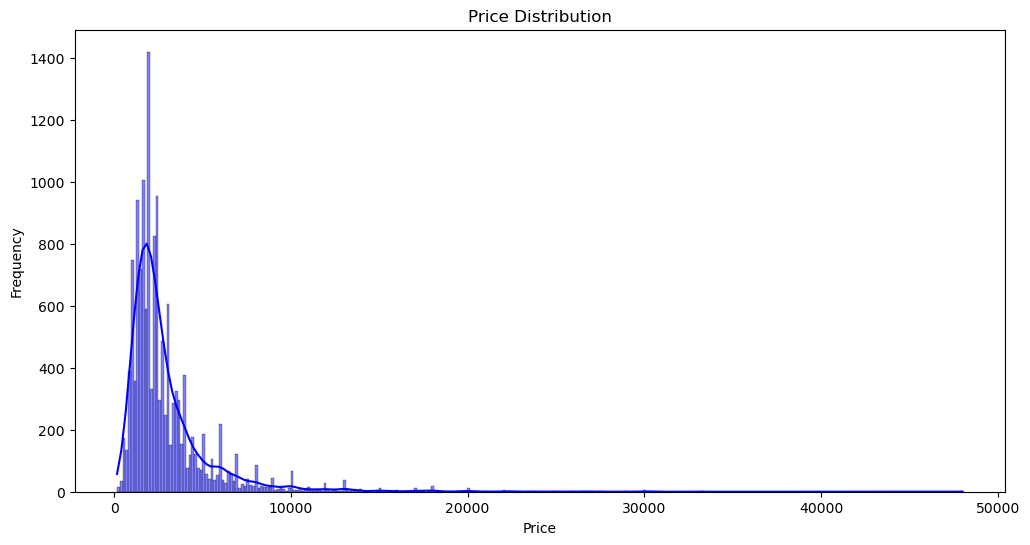

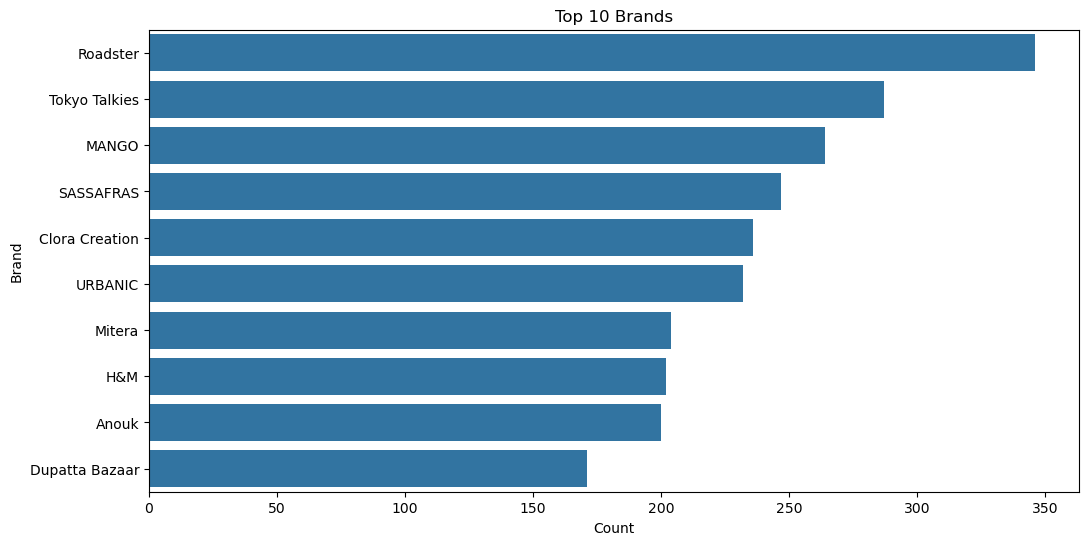

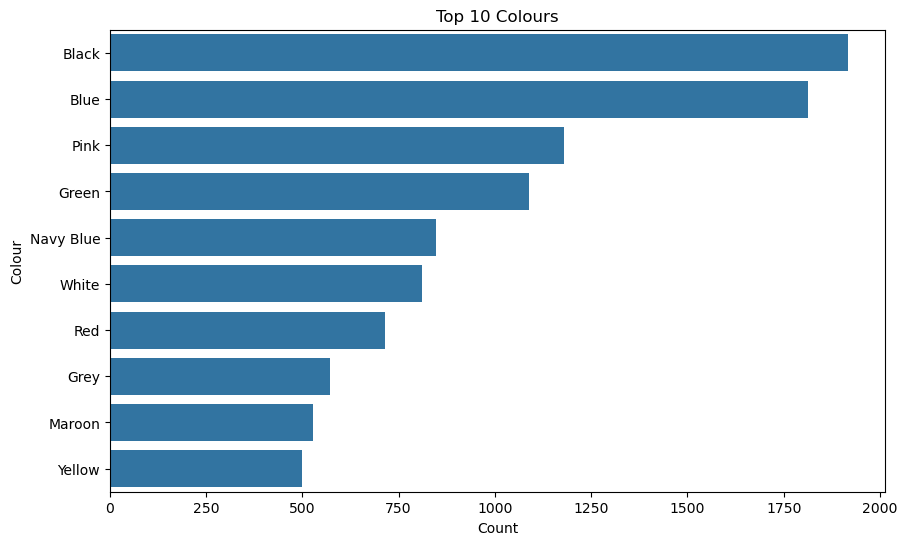

Top Recommendations:
           p_id                                               name   price  \
921  15110986.0  Prakhya Women Black Ethnic Motifs Printed Kurt...  3498.0   
9    17048604.0  Khushal K Women Green & Pink Printed Pure Cott...  5299.0   
472  17447640.0  Khushal K Women White Ethnic Motifs Printed Go...  4799.0   
652  14860664.0  Vishudh Women Black Regular Printed Kurta with...  2349.0   
726  13446308.0  Biba Women Black & Grey Ethnic Printed Regular...  4299.0   

    colour      brand  avg_rating  
921  Black    Prakhya    4.481481  
9    Green  Khushal K    4.266038  
472  White  Khushal K    3.813953  
652  Black    Vishudh    4.275000  
726  Black       Biba    4.166667  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Load the data
file_path = r'D:\Manipal University\Myntra Dataset\Fashion Dataset.csv'
df = pd.read_csv(file_path)

# Display dataset information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nDataset Shape: Rows =", df.shape[0], ", Columns =", df.shape[1])
print("\nSummary Statistics:")
print(df.describe())

# Visualization for basic data understanding
plt.figure(figsize=(12, 6))
sns.histplot(df['price'].dropna(), kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['brand'].fillna('Unknown'), order=df['brand'].value_counts().index[:10])
plt.title('Top 10 Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y=df['colour'].fillna('Unknown'), order=df['colour'].value_counts().index[:10])
plt.title('Top 10 Colours')
plt.xlabel('Count')
plt.ylabel('Colour')
plt.show()

# Step 1: Data Preprocessing
# Fill missing values
df['description'] = df['description'].fillna('')
df['name'] = df['name'].fillna('')
df['colour'] = df['colour'].fillna('Unknown')
df['brand'] = df['brand'].fillna('Unknown')
df['price'] = df['price'].fillna(df['price'].median())
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].median())

# Combine name and description for text processing
df['text'] = df['name'] + ' ' + df['description']

# Step 2: Feature Engineering
# 2.1 Textual Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_text = vectorizer.fit_transform(df['text'])

# 2.2 One-Hot Encoding for Categorical Features (colour and brand)
categorical_features = df[['colour', 'brand']]
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
ohe_features = ohe.fit_transform(categorical_features)

# 2.3 Normalize Numerical Features (price and avg_rating)
numerical_features = df[['price', 'avg_rating']]
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(numerical_features)

# Step 3: Combine All Features
combined_features = hstack([tfidf_text, ohe_features, scaled_numerical])

# Step 4: Compute Cosine Similarity
cosine_sim = cosine_similarity(combined_features, combined_features)

# Step 5: Recommendation Function
def recommend(product_id, num_recommendations=5):
    try:
        idx = df[df['p_id'] == product_id].index[0]  # Find the index of the product
    except IndexError:
        print("Product ID not found in the dataset.")
        return None
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    product_indices = [i[0] for i in sim_scores]
    return df.iloc[product_indices]

# Example Usage
product_id = 17048614  # Replace with a valid product ID from your dataset
recommendations = recommend(product_id, num_recommendations=5)
print("Top Recommendations:")
print(recommendations[['p_id', 'name', 'price', 'colour', 'brand', 'avg_rating']])
